<a href="https://colab.research.google.com/github/riskakurniaa/Machine-Learning/blob/Jobsheet3/TugasPraktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

# Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**
*   Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
*   Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
*   Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Jawaban:**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).


Berikut adalah identifikasi variabel bebas (fitur) dan variabel target:
*   Variabel Target (Y):
    
    **charges:** Biaya medis personal, yang menjadi variabel target dalam model regresi.
*   Variabel Bebas (Fitur):
    1.   **age:** Umur pasien.
    2.   **sex:** Jenis kelamin (pria/wanita).
    3. **bmi:** Indeks Massa Tubuh (BMI) yang mengukur kadar lemak dalam tubuh berdasarkan tinggi dan berat badan.
    4. **children:** Jumlah anak/dependents yang diasuransikan.
    5. **smoker:** Status merokok (ya/tidak).
    6. **region:** Wilayah tempat tinggal pasien.

Import Library

In [37]:
import pandas as pd # Untuk membaca, memanipulasi, dan mengelola dataset.
import numpy as np # Untuk komputasi numerik dan operasi array.

import matplotlib.pyplot as plt # Untuk membuat visualisasi data seperti grafik dan plot.
import seaborn as sns # Untuk membuat visualisasi statistik yang lebih menarik dan informatif.
from sklearn.compose import make_column_transformer
# Untuk menerapkan transformasi berbeda pada kolom dataset (contohnya, encoding untuk kategorikal, penskalaan untuk numerik).

from sklearn.preprocessing import OneHotEncoder, StandardScaler
# OneHotEncoder: Mengonversi variabel kategorikal ke bentuk numerik biner.
# StandardScaler: Menstandarkan fitur numerik ke skala yang sama.

from sklearn.model_selection import train_test_split # Membagi dataset menjadi data latih dan data uji untuk melatih dan menguji model.

from sklearn.linear_model import LinearRegression
# Melatih model regresi linier untuk memprediksi nilai target berdasarkan variabel fitur.

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Menghitung metrik evaluasi seperti MSE (Mean Squared Error), R-squared (R2), dan MAE (Mean Absolute Error).

from sklearn.pipeline import make_pipeline
# Menggabungkan langkah-langkah preprocessing dan pelatihan model ke dalam satu alur otomatis.

from sklearn.preprocessing import LabelEncoder

In [38]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Pemahaman terhadap Data

In [39]:
# ukuran data
df.shape

(1338, 7)

138 mewakili jumlah baris dalam DataFrame. 7 mewakili jumlah kolom dalam DataFrame.

In [40]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*   **Jumlah Baris dan Kolom:**

    DataFrame memiliki 1338 baris (entries) dan 7 kolom.
*   **Informasi Kolom:**
    
    Nama setiap kolom ditampilkan beserta jumlah data non-null dan tipe datanya. Misalnya, 'age' dan 'children' adalah integer (int64), 'bmi' dan 'charges' adalah float (float64), dan 'sex', 'smoker', 'region' adalah object (biasanya string).
*   **Tipe Data:**
    
    Terdapat 2 kolom bertipe float64, 2 kolom int64, dan 3 kolom object.
*   **Nilai Null:**
    
    Semua kolom memiliki 1338 nilai non-null, yang berarti tidak ada nilai yang hilang dalam dataset.
*   **Penggunaan Memori:**
    
    DataFrame menggunakan sekitar 73.3+ KB memori.

In [41]:
# deskripsi data (memberikan ringkasan statistik dari kolom-kolom numerik dalam DataFrame.)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Berikut adalah kode yang akan memberikan jumlah total nilai yang hilang di setiap kolom dalam dataset. Jika suatu kolom tidak memiliki nilai hilang, hasilnya akan 0 untuk kolom tersebut. Ini membantu untuk mengetahui apakah ada data yang tidak lengkap

In [42]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Mengubah data kategorikal menjadi numerik: sex, smoker, dan region

In [43]:
# Encoding kategorikal
le = LabelEncoder() # membuat instance dari kelas LabelEncoder dari scikit-learn.
df['sex'] = le.fit_transform(df['sex'])
# Mengubah nilai-nilai dalam kolom 'sex' (misalnya 'male', 'female') menjadi angka (0, 1).
df['smoker'] = le.fit_transform(df['smoker'])
# Mengubah nilai-nilai dalam kolom 'smoker' (misalnya 'yes', 'no') menjadi angka (0, 1).
df['region'] = le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Visualisasi Data**

Pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

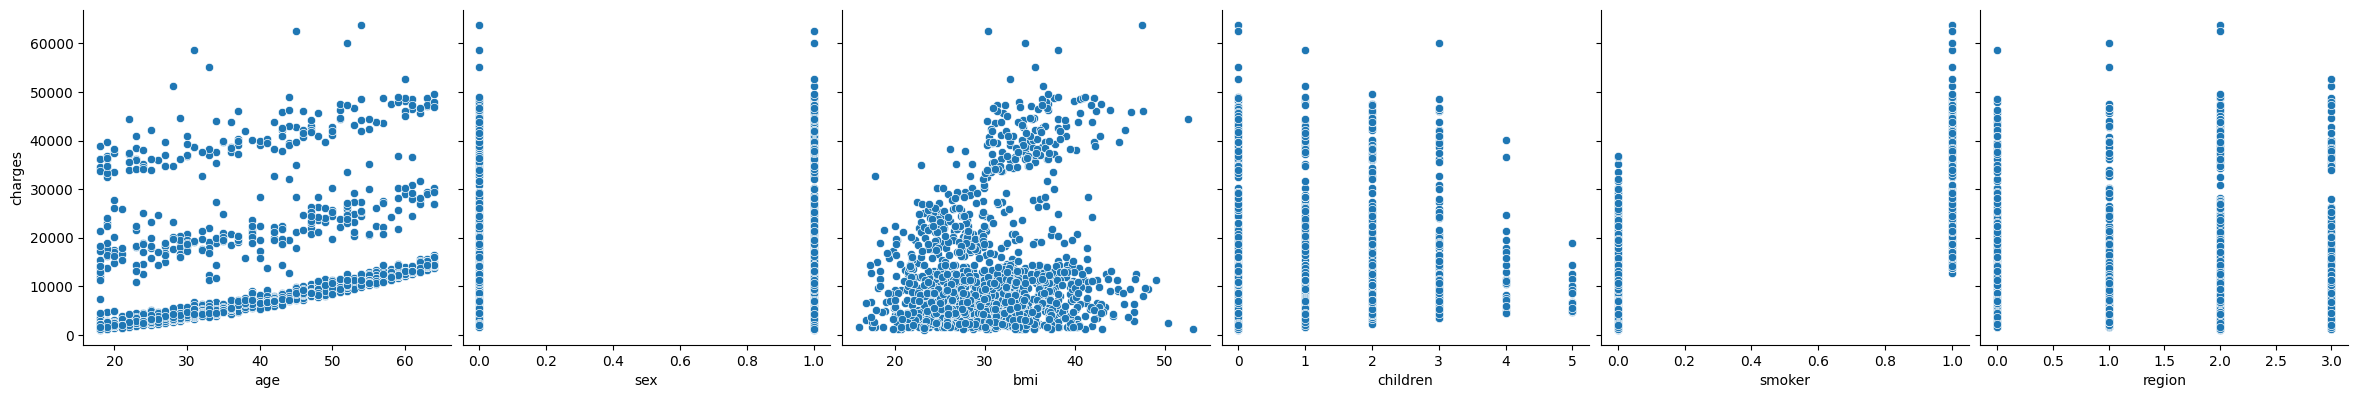

In [44]:
# Operasi visualisasi
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

Kode tersebut menghasilkan scatter plots untuk memvisualisasikan hubungan antara beberapa variabel independen (seperti usia, BMI, jumlah anak, status perokok, wilayah, jenis kelamin) dengan variabel target (charges, yaitu biaya medis).

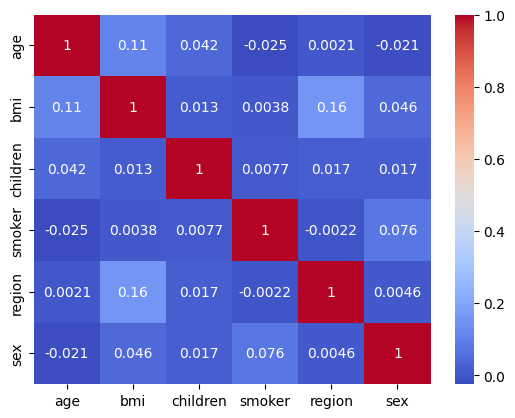

In [45]:
# Konversi variabel kategorikal ke numerik dengan one-hot encoding
df_encoded = pd.get_dummies(df[['age', 'bmi', 'children', 'smoker', 'region', 'sex']], drop_first=True)

# Menghitung korelasi antar variabel
corr = df_encoded.corr()

# Membuat visualisasi heatmap dari matriks korelasi
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Tampilkan plot
plt.show()

Heatmap korelasi memberikan gambaran visual tentang bagaimana variabel-variabel dalam dataset berinteraksi satu sama lain, membantu kita memahami hubungan antar-variabel dengan lebih mudah dan efisien.

In [46]:
# Variabel target (biaya medis personal)
target_variable = df['charges']

# Variabel bebas (fitur) yang dipilih
independent_variables = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Menampilkan beberapa baris pertama dari data
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


Kode tersebut menyiapkan data untuk memprediksi biaya medis berdasarkan faktor usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah tempat tinggal.

**2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [47]:
# Memisahkan fitur (X) dan target (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# X: Variabel-variabel yang digunakan sebagai fitur untuk memprediksi biaya medis (age, bmi, children, smoker, region, sex).
# y: Variabel target, yaitu biaya medis (charges), yang ingin diprediksi.

# Pembagian data latih dan data uji dengan proporsi 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# Membagi dataset menjadi data latih (70%) dan data uji (30%) secara acak.

# Menampilkan ukuran dari data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 936
Jumlah data uji: 402


Jadi, kode tersebut memisahkan dataset menjadi fitur dan target, kemudian membagi dataset tersebut menjadi data latih (70%) dan data uji (30%). Data latih digunakan untuk melatih model prediksi, sementara data uji digunakan untuk mengevaluasi performa model.

**3. Lakukan feature scaling jika diperlukan**

**4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [48]:
# Membuat transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['age', 'bmi', 'children']),  # Normalisasi variabel numerik
    (OneHotEncoder(), ['sex', 'smoker', 'region'])  # Encode variabel kategorikal
)

Kode tersebut membuat transformer yang akan menormalkan variabel numerik dan meng-encode variabel kategorikal. Proses ini penting untuk menyiapkan data sebelum dimasukkan ke model machine learning, sehingga semua fitur dapat diproses dengan benar.

In [49]:
# Membuat model
model = LinearRegression()

model_pipeline = make_pipeline(preprocessor, model)
# preprocessor: Melakukan preprocessing (normalisasi dan encoding) pada data.
# model: Model regresi linier yang digunakan untuk prediksi setelah data diproses.

Kode tersebut membuat pipeline model prediksi biaya medis menggunakan regresi linier. Jadi, akan otomatis melakukan preprocessing data sebelum melatih model, sehingga data siap untuk prediksi tanpa harus memprosesnya secara manual setiap kali.

**5. Latih model pada data latih dan lakukan prediksi pada data uji.**

In [50]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

Pada langkah ini, pipeline melakukan preprocessing data (normalisasi dan encoding) terlebih dahulu, lalu melatih model regresi linier dengan data yang telah diproses.
*  **fit():** Melatih pipeline model menggunakan data latih (X_train dan y_train).
*   **X_train:** Fitur yang telah dipisahkan untuk melatih model.
*  **y_train:** Target (biaya medis) yang sesuai dengan fitur tersebut.

Kode tersebut melatih pipeline model regresi linier dengan data latih. Data fitur diproses secara otomatis (scaling dan encoding) sebelum model dilatih untuk memprediksi biaya medis personal berdasarkan fitur-fitur yang tersedia.

In [51]:
# Melakukan prediksi
y_pred = model_pipeline.predict(X_test)

Hasil ini digunakan untuk memprediksi biaya medis berdasarkan data uji yang nantinya dapat dibandingkan dengan nilai aktual untuk mengevaluasi performa model.

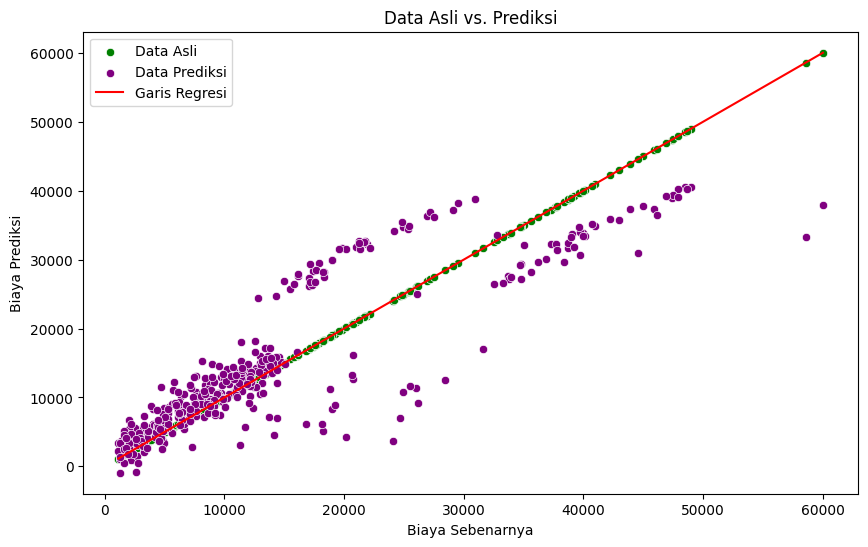

In [56]:
# Plot Data Asli dan Prediksi dengan warna yang berbeda
plt.figure(figsize=(10, 6))
# Membuat figure untuk plot dengan ukuran 10x6.

# Scatter plot data asli (biru)
sns.scatterplot(x=y_test, y=y_test, color='green', label='Data Asli')
# Plot titik-titik dari data asli (y_test) dalam warna hijau. Ini menunjukkan biaya medis sebenarnya dari data uji.

# Scatter plot data prediksi (merah)
sns.scatterplot(x=y_test, y=y_pred, color='purple', label='Data Prediksi')
# Plot titik-titik dari prediksi model (y_pred) dalam warna biru. Ini menunjukkan biaya medis yang diprediksi oleh model.

# Garis regresi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Garis Regresi')
# Menambahkan garis merah lurus dari nilai minimum ke maksimum dari data uji. Garis ini menunjukkan "prediksi sempurna" (di mana nilai prediksi sama dengan nilai asli).

plt.xlabel("Biaya Sebenarnya")
plt.ylabel("Biaya Prediksi")
plt.title("Data Asli vs. Prediksi")
plt.legend()
plt.show()

Kode tersebut membuat plot perbandingan antara biaya medis asli dan biaya yang diprediksi oleh model yang dapat membantu memvisualisasikan seberapa akurat prediksi model dengan membandingkan titik-titik data asli dan prediksi. Garis regresi merah menunjukkan prediksi yang ideal, di mana semua prediksi akan tepat di garis tersebut jika model sempurna.

**6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [58]:
# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print(f'R-squared: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.78
MSE: 32345536.75
MAE: 3943.24
RMSE: 5687.31


Kode program tersebut digunakan untuk mengevaluasi kinerja model regresi dengan menghitung beberapa metrik utama. Pertama, **R-squared (R²)** dihitung untuk mengukur seberapa baik model dapat menjelaskan variasi dalam data, dengan nilai yang mendekati 1 menunjukkan model yang baik. Kemudian, **Mean Squared Error (MSE)** dihitung sebagai rata-rata dari selisih kuadrat antara nilai asli dan prediksi, di mana nilai MSE yang lebih rendah menunjukkan akurasi yang lebih baik. Selanjutnya, **Mean Absolute Error (MAE)** dihitung sebagai rata-rata dari selisih absolut antara nilai asli dan prediksi, yang memberikan ukuran rata-rata kesalahan dalam satuan data asli. Terakhir, **Root Mean Squared Error (RMSE)** dihitung dengan mengambil akar kuadrat dari MSE, yang memberikan indikasi deviasi prediksi dari nilai asli dalam satuan yang sama dengan target data. Hasil evaluasi metrik tersebut ditampilkan dalam format dua angka desimal untuk memudahkan interpretasi.